# Higher Order ODEs,  

## Multidimensional Stiff Equations

Consider 

$y_1'=-y_2$

$y_2'=100y_1-101y_2$

Which is a 2nd order system of linear coupled equations. We may express this in matrix form, and then solve for the eigenvalues and eigenvectors of the matrix A.

Turns out the eigenvalues for this matrix are $-1$ and $-100$, so the solution will be a linear combination of $e^{-x}$ and $e^{-100x}$.

We can see immediately that the $e^{-100x}$ terms are completely negligible compared to the other term. We wish our numerical scheme to exhibit this kind of behaviour as well.

By the explicit Euler we get:

$\vec{y}_{n+1}=(I+\delta x A)\vec{y}_n$

and

$\vec{y}_{n}=(I+\delta x A)^n\vec{y}_0$

Consider the amplification factor:

$\lambda=(I+\delta x A)$

If we consider the vector $y_n$ as some linear combination of eigenvectors (as the eigenvectors should span the vector space) then we can simplify the equation before

$\vec{y}_{n}=\sum_{i}\alpha_i(I+\delta x \lambda_i)^n v_i$

so we get a conditionally stable scheme with the following condition (recall that this is the 2nd condition in the previous lecture, not the 1st one):

$|1+\delta x \lambda_i|<1$

So we require these conditions due to our eigenvalues:

$\delta x < 2$ from $\lambda_1=-1$
$\delta x < 100$ from $\lambda_2=-100$ 

So we are given a very stringent condition on our set of equations:

$\delta x < \frac{2}{|\lambda_{max}|}$

A stiff set of equations is an equation such that the ratio $\frac{\lambda_{max}}{\lambda_{min}}$ is LARGE then the system of equations is stiff and __hard to integrate explicitly__

We can get around this by solving it implicitly! 

We thus get the following scheme

$\vec{y}_{n+1}=(I-\delta A)^{-1}\vec{y}_n$

Let's summarise

### Explicit Approach

__Advantage__: Simple to set up and program

__Disadvantage__: Stepsize might be limited due to stability constraints

### Implicit

__Advantage__: Stability can be maintained over much larger values of stepsize

__Disadvantages__: 
1. More complicated to set up and program
2. MASSIVE matrix inversion might be required (possibly per time step of the matrix is time dependent) 
3. Larger truncation error if larger timesteps taken

Higher order ODEs can be written as coupled first order ODEs. Let's look at a damped harmonic oscillator

$\ddot{x}+2\psi \omega_0 \dot{x} + \omega_0^2x=0$

So we define $v=\dot{x}$ which gives us:

$\frac{d}{dt}
\begin{pmatrix}
v\\
x
\end{pmatrix}
=
\begin{pmatrix}
-2\psi\omega_0 & -\omega_0^2\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
v\\
x
\end{pmatrix}
$

The eigenvalues of the matrix are:

$\lambda=-\psi \omega_0 \pm \omega_0\sqrt{\psi^2-1}$

So changing the damping ratio and the natural frequencies which changes properties of the solution AND THE CONDITIONS OF STABILITY

3 possibilities:
1. Underdamped $\psi<1$
2. Overdamped $\psi>1$
3. Critically Damped $\psi=1$

Solving with an explicit scheme leaves the following constraint on our step size.

A reminder that the constraint is $|1+\lambda \delta t|<1$



If we consider the underdamped harmonic oscillator.

Underdamped: Plugging it in gives us $\delta t < \frac{2\psi}{\omega}$. Note that if $\psi=0$ then the explicit scheme is UNSTABLE FOR ALL $\delta t$!

This may be fixed with an implicit scheme, which is stable for all values of $\delta t$.

Let's code this now.

$\frac{d}{dt}
\begin{pmatrix}
x\\
v
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
-\omega_0^2 & -2\psi\omega_0 
\end{pmatrix}
\begin{pmatrix}
x\\
v
\end{pmatrix}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def EEuler_2DLinear(A,x0,v0,t):
    #Function to solve a 2D coupled ODE with the matrix for initial condition x=x0 and v=v0 at t=t[0] using the Explicit Forward Euler Method
    #f = Matrix of coefficients of the coupled ODE (2x2 numpy array)
    #x0 = x value at t=t[0] (float)
    #v0 = v value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    #v = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    
    dt=t[1]-t[0] #Create grid step
    s=np.zeros([2,len(t)]) #Create numpy array of 
    s[0,0]=x0
    s[1,0]=v0
    for k in range(1,len(t)): #Loop for each t point
        s[:,k]=s[:,k-1]+np.dot(A,s[:,k-1])*dt
        
    x=s[0,:]
    v=s[1,:]
    
    return x,v

In [92]:
def BEuler_2DLinear(A,x0,v0,t):
    #Function to solve a 2D coupled ODE with the matrix for initial condition x=x0 and v=v0 at t=t[0] using the Implicit Euler Method
    #f = Matrix of coefficients of the coupled ODE (2x2 numpy array)
    #x0 = x value at t=t[0] (float)
    #v0 = v value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    #v = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    
    dt=t[1]-t[0] #Create grid step
    s=np.zeros([2,len(t)]) #Create numpy array of 
    s[0,0]=x0
    s[1,0]=v0
    
    I=np.identity(2)
    
    B=np.linalg.inv(I-dt*A)
    
    for k in range(1,len(t)): #Loop for each t point
        s[:,k]=np.dot(B,s[:,k-1])
        
    x=s[0,:]
    v=s[1,:]
    
    return x,v

In [152]:
def RK2twoD(A,x0,v0,t):
    #Function to solve a 2D coupled ODE with the matrix for initial condition x=x0 and v=v0 at t=t[0] using the Explicit Forward Euler Method
    #f = Matrix of coefficients of the coupled ODE (2x2 numpy array)
    #x0 = x value at t=t[0] (float)
    #v0 = v value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    #v = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    
    dt=t[1]-t[0] #Create grid step
    s=np.zeros([2,len(t)]) #Create numpy array of 
    s[0,0]=x0
    s[1,0]=v0
    for k in range(1,len(t)): #Loop for each t point
        
        c=dt/2*np.dot(A,s[:,k-1])
        
        c=np.array([c[0,0],c[0,1]])
        
        #c=dt/2*np.dot(A,s[:,k-1])[0,0]
        
        s[:,k]=s[:,k-1]+dt*np.dot(A,s[:,k-1]+c)
        
    x=s[0,:]
    v=s[1,:]
    
    return x,v

In [164]:
def RK4twoD(A,x0,v0,t):
    #Function to solve a 2D coupled ODE with the matrix for initial condition x=x0 and v=v0 at t=t[0] using the Explicit Forward Euler Method
    #f = Matrix of coefficients of the coupled ODE (2x2 numpy array)
    #x0 = x value at t=t[0] (float)
    #v0 = v value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    #v = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method (1D numpy array)
    
    dt=t[1]-t[0] #Create grid step
    s=np.zeros([2,len(t)]) #Create numpy array of 
    s[0,0]=x0
    s[1,0]=v0
    
    for k in range(1,len(t)): #Loop for each t point
        
        #print(np.dot(A,s[:,k-1]))
        
        s1=np.dot(A,s[:,k-1])
        s1=np.array([s1[0,0],s1[0,1]])
        
        s2=np.dot(A,s[:,k-1]+dt/2*s1)
        s2=np.array([s2[0,0],s2[0,1]])
        
        s3=np.dot(A,s[:,k-1]+dt/2*s2)
        s3=np.array([s3[0,0],s3[0,1]])

        s4=np.dot(A,s[:,k-1]+dt/2*s3)
        s4=np.array([s4[0,0],s4[0,1]])
        
        #print(s1)
        #print(s2)
        #print(s3)
        #print(s4)

        s[:,k]=s[:,k-1]+dt/6*(s1+2*s2+2*s3+s4)
        
    x=s[0,:]
    v=s[1,:]
    
    return x,v

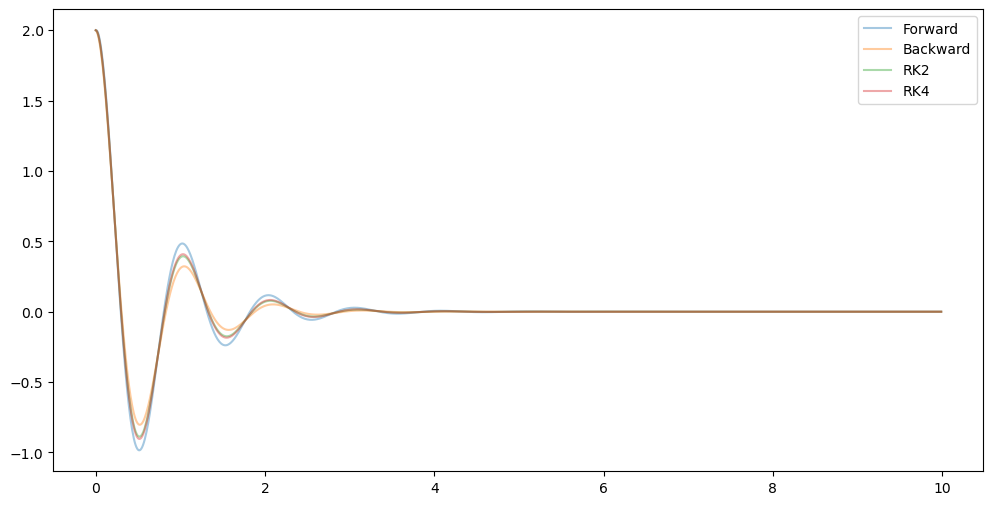

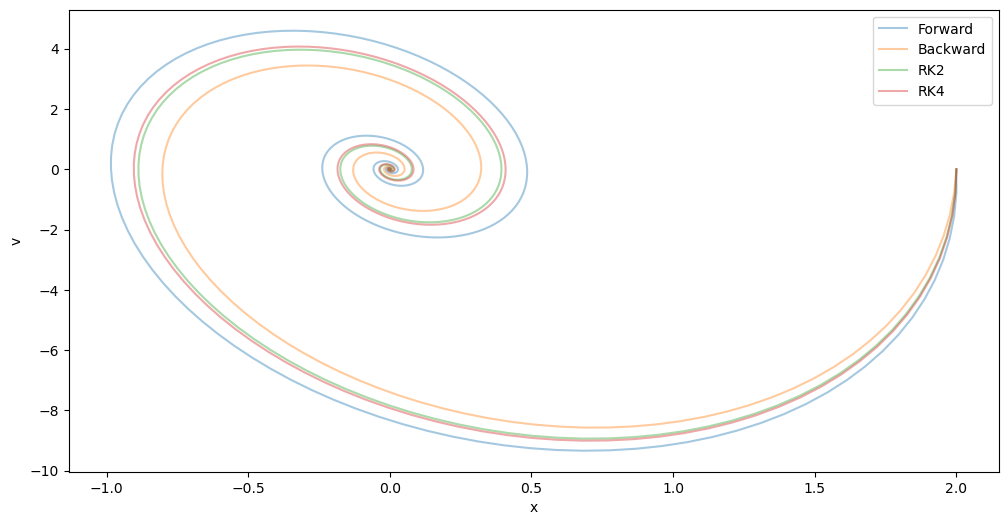

In [171]:
phi=0.25
omega=2*np.pi

A=np.matrix([[0,1],[-omega**2,-2*phi*omega,]])
x0=2
v0=0

dt=0.01
ti=0
tf=10

t=np.arange(ti,tf,dt)

xe,ve=EEuler_2DLinear(A,x0,v0,t)
xi,vi=BEuler_2DLinear(A,x0,v0,t)
xRK2,vRK2=RK2twoD(A,x0,v0,t)
xRK4,vRK4=RK4twoD(A,x0,v0,t)


figure=plt.figure(figsize=(12,6))
plt.plot(t,xe,label='Forward',alpha=0.4)
plt.plot(t,xi,label='Backward',alpha=0.4)
plt.plot(t,xRK2,label='RK2',alpha=0.4)
plt.plot(t,xRK4,label='RK4',alpha=0.4)
plt.legend()

figure=plt.figure(figsize=(12,6))
plt.plot(xe,ve,label='Forward',alpha=0.4)
plt.plot(xi,vi,label='Backward',alpha=0.4)
plt.plot(xRK2,vRK2,label='RK2',alpha=0.4)
plt.plot(xRK4,vRK4,label='RK4',alpha=0.4)
plt.xlabel('x')
plt.ylabel('v')
plt.legend()


In [172]:
from mpl_toolkits import mplot3d

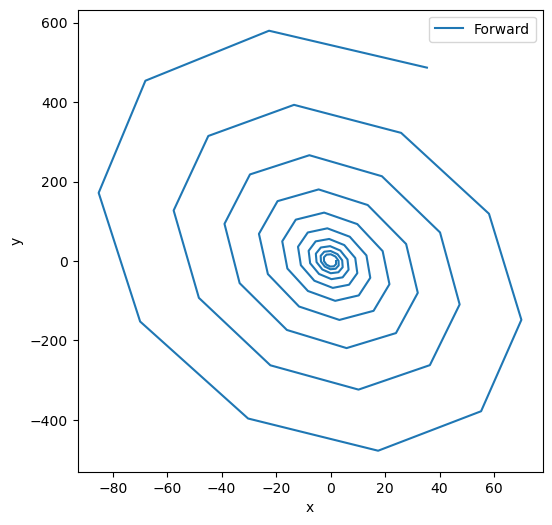

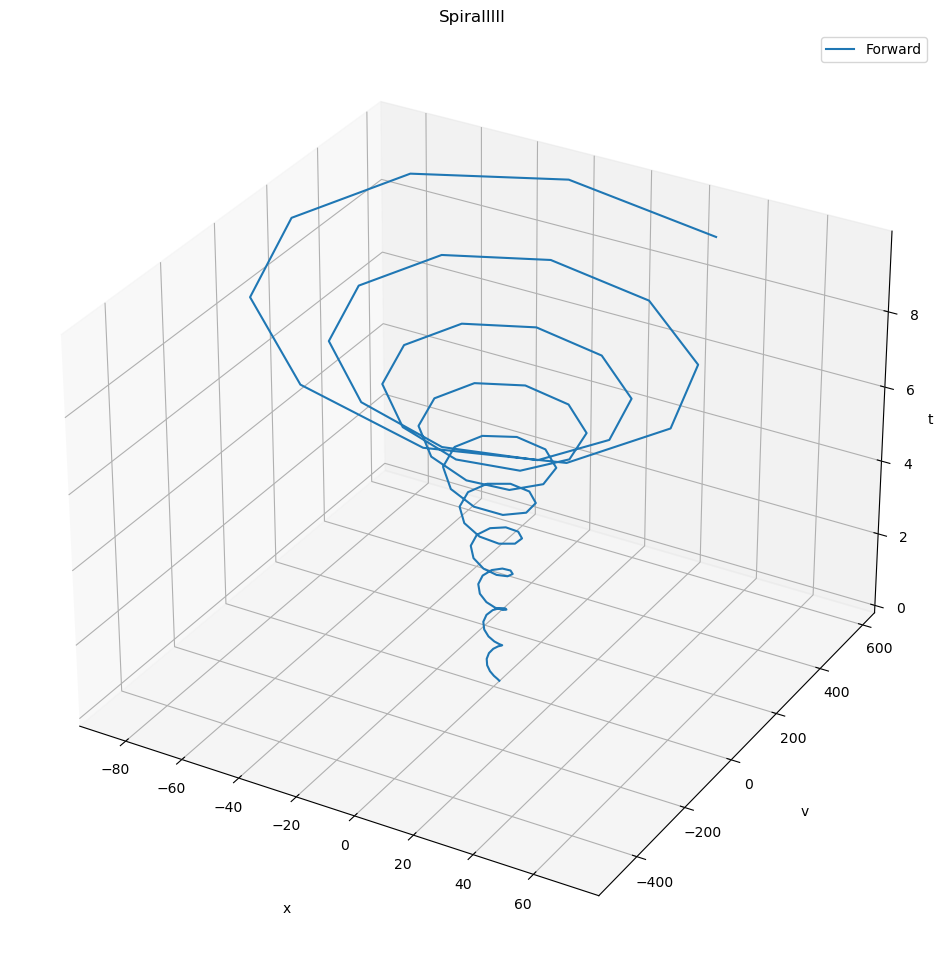

In [188]:
phi=0.25
omega=2*np.pi

A=np.matrix([[0,1],[-omega**2,-2*phi*omega,]])
x0=2
v0=0

dt=0.1
ti=0
tf=10

t=np.arange(ti,tf,dt)

x,v=EEuler_2DLinear(A,x0,v0,t)

figure=plt.figure(figsize=(6,6))
plt.plot(x,v,label='Forward')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fig2=plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.grid()

ax.plot3D(x,v,t,label='Forward')
ax.set_title('Spiralllll')
ax.set_xlabel('x', labelpad=30)
ax.set_ylabel('v', labelpad=20)
ax.set_zlabel('t', labelpad=0)
ax.legend()

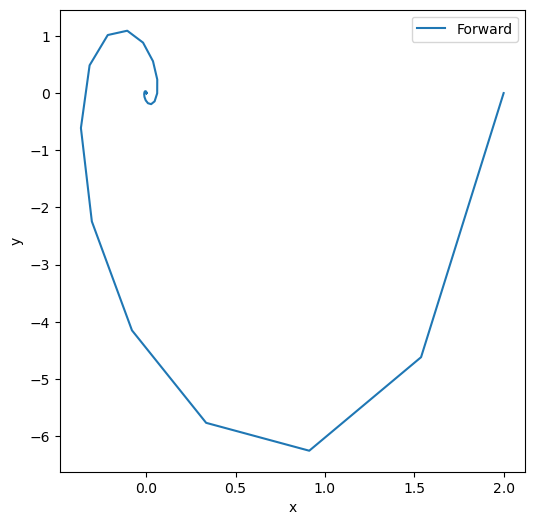

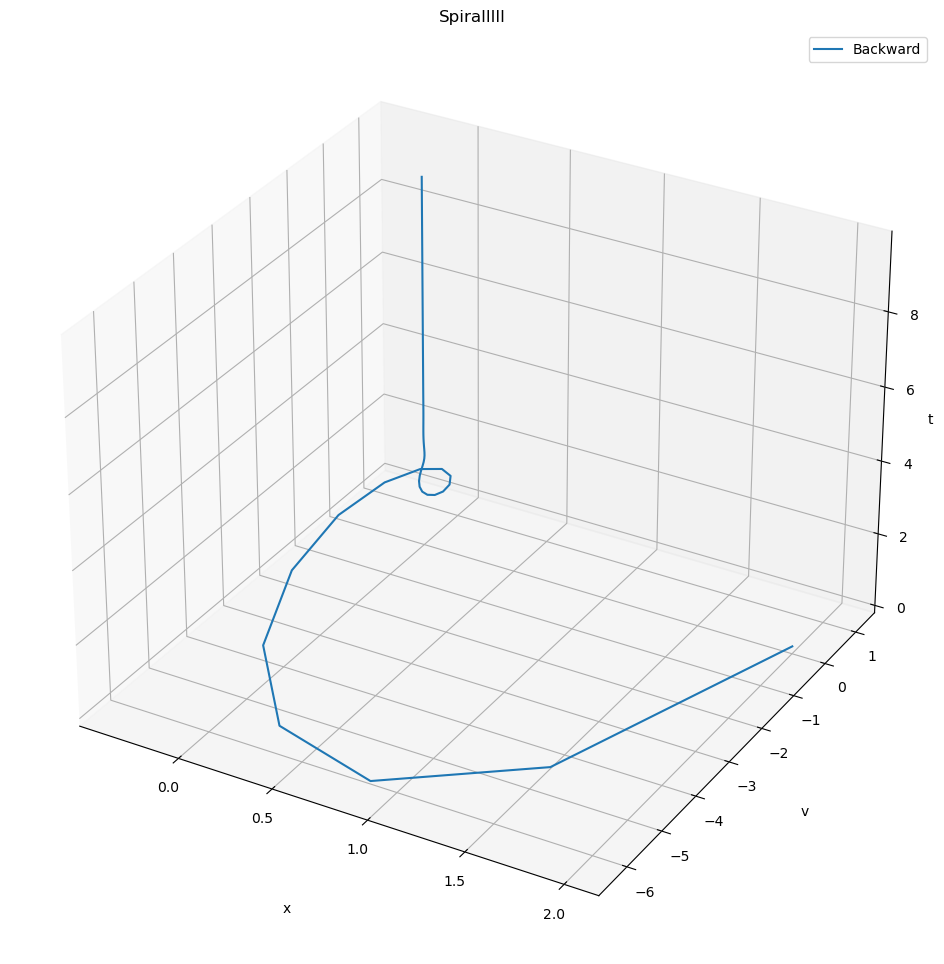

In [187]:
x,v=BEuler_2DLinear(A,x0,v0,t)

figure=plt.figure(figsize=(6,6))
plt.plot(x,v,label='Forward')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

fig2=plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.grid()

ax.plot3D(x,v,t,label='Backward')
ax.set_title('Spiralllll')
ax.set_xlabel('x', labelpad=30)
ax.set_ylabel('v', labelpad=20)
ax.set_zlabel('t', labelpad=0)
ax.legend()